__Задача 1__

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150.

Без использования статистических функций вроде mean, std, var, посчитать среднее арифметическое, среднее квадратичное отклонение, смещенную и несмещенную оценки дисперсий для данной выборки.

Можно затем посчитать те же значения с использованием статистических функций, чтобы проверить себя.

In [41]:
import warnings

import statistics as sts
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

warnings.filterwarnings('ignore')

In [20]:
salary_list = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 24, 57, 55, 70, 75, 65, 84, 90, 150]

Среднее арифметическое:

In [21]:
def salary_mean(a=list):
    sal_sum = 0
    for i in a:
        sal_sum = sal_sum + i
        sal_mean = sal_sum / len(a)
    return(sal_mean)

In [22]:
salary_mean(salary_list)

65.3

Проверка с использованием вложенного метода .mean:

In [29]:
np.mean(salary_list)

65.3

Среднее квадратичное отклонение:

In [32]:
def salary_standartdeviation(b=list):
    std_sum = 0
    for i in b:
        std_sum = std_sum + ((i - salary_mean(b))**2)
        salary_std =  np.sqrt(std_sum / len(b))
    return(salary_std)

salary_standartdeviation(salary_list)

30.823854398825596

Проверка с использованием вложенного метода .std:

In [30]:
np.std(salary_list)

30.823854398825596

Смещенная дисперсия:

In [35]:
def salary_biased_sample_variance(c=list):
    bsv_sum = 0
    for i in c:
        bsv_sum = bsv_sum + ((i - salary_mean(c)) ** 2)
        salary_bsv = bsv_sum / len(c)
    return (salary_bsv)

In [36]:
salary_biased_sample_variance(salary_list)

950.11

Проверка с использованием вложенного метода .var(ddof=0):

In [38]:
np.var(salary_list)

950.11

Несмещенная дисперсия:

In [39]:
def salary_unbiased_sample_variance(d=list):
    unbsv_sum = 0
    for i in d:
        unbsv_sum = unbsv_sum + ((i - salary_mean(d)) ** 2)
        salary_unbsv = unbsv_sum / (len(d) - 1)
    return (salary_unbsv)

In [40]:
salary_unbiased_sample_variance(salary_list)

1000.1157894736842

__Задача 2__

Для выборки из задачи 1 найти первый и третий квартили, интерквартильное расстояние. Найти выборсы в выборке, используя для этого "усы" из boxplot. В этой задаче можно использовать статистические функции.

In [56]:
q1 = np.quantile(salary_list, 0.25)
q1

42.0

In [57]:
q3 = np.quantile(salary_list, 0.75)
q3

81.0

In [58]:
iqr = q3 - q1
iqr

39.0

{'whiskers': [<matplotlib.lines.Line2D at 0x19b897d6190>,
 'caps': [<matplotlib.lines.Line2D at 0x19b897d68b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x19b897c7e80>],
 'medians': [<matplotlib.lines.Line2D at 0x19b897d6fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19b897e03a0>],
 'means': []}

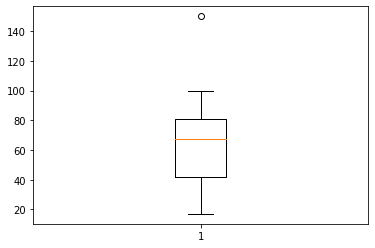

In [59]:
plt.boxplot(salary_list)

In [60]:
boxplot_range = (q1 - 1.5 * iqr, q3 + 1.5 * iqr)

In [73]:
boxplot_range

(-16.5, 139.5)

Найдём значения, которые оказались за пределами "усов", их количество и долю от общей выборки:

In [71]:
def outliers(e=list):
    outliers_list = []
    outliers_count = 0
    for i in e:
        if i < boxplot_range[0] or i > boxplot_range[1]:
            outliers_list.append(i)
            outliers_count += 1
            outliers_share = outliers_count / len(e)
    return(outliers_list, outliers_count, outliers_share)

In [72]:
outliers(salary_list)

([150], 1, 0.05)

__Задача 3__

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Количество студентов на каждом факультете от общего количества:
А - 0.25; 
В - 0.25; 
С - 0.50; 

Полная вероятность сдать экзамен для всех студентов:

In [75]:
P = 0.25 * 0.8 + 0.25 * 0.7 + 0.5 * 0.9
P

0.825

Вероятность, что первую сессию сдал студент одного из 3-х факультетов рассчитываем по формуле Байеса: вероятность того, что студент из данного факультета * вероятность сдать сессию для студента этого факультета / полная вероятность того, что студент любого факультета сдаст сессию

In [79]:
P_A = 0.25 * 0.8 / P
P_A

0.24242424242424246

In [80]:
P_B = 0.25 * 0.7 / P
P_B

0.21212121212121213

In [81]:
P_C = 0.5 * 0.9 / P
P_C

0.5454545454545455